# Seyed Mohammad Amin Atyabi - 830402014

# Linear Separability

**1**

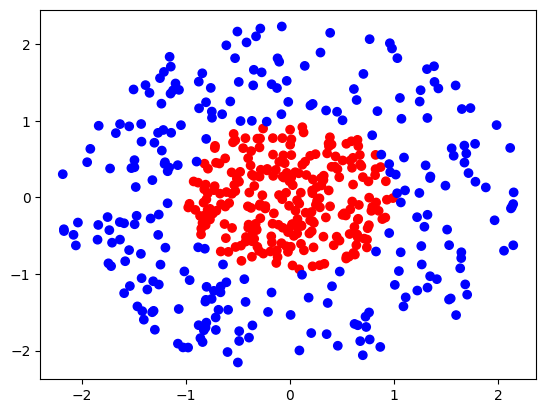

In [46]:
import numpy
from matplotlib import pyplot as plt


def random_point(radius, radius_start):
    alpha = 2 * numpy.pi * numpy.random.random()
    r = radius * numpy.sqrt(numpy.random.random() + (radius_start / 4))
    x = r * numpy.cos(alpha)
    y = r * numpy.sin(alpha)
    return x, y


color = {'r': 0.0, 'b': 1.0}

point_count = 250
X = []
Y = []
Z = []
for i in range(point_count):
    x, y = random_point(1, 0)
    X.append(x)
    Y.append(y)
    Z.append('r')

for i in range(point_count):
    x, y = random_point(2, 1)
    X.append(x)
    Y.append(y)
    Z.append('b')

data = numpy.array([X, Y])
Z = numpy.array(Z)

plt.scatter(data[0], data[1], color=Z)
plt.show()

**2**

Theta: [ 0.03240467 -0.00635247  0.11404517]
Accuracy: 0.448


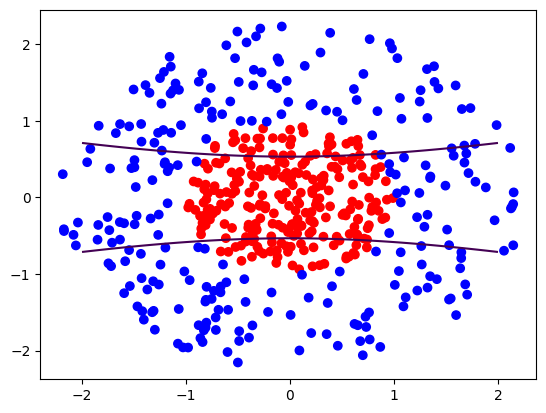

In [47]:
from sklearn.metrics import accuracy_score

label = Z.copy()
label[label == 'r'] = color['r']
label[label == 'b'] = color['b']
label = label.astype(float)


def sigmoid(x, theta):
    return 1 / (1 + numpy.exp(-numpy.dot(x, theta)))


def cost_function(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X, theta)
    loss = (-1 / m) * numpy.sum(y * numpy.log(h) + (1 - y) * numpy.log(1 - h))
    return loss


def gradient_descent(theta, X, y, learning_rate, iterations):
    m = X.shape[0]
    for _ in range(iterations):
        h = sigmoid(X, theta)
        error = h - y
        delta_theta = (1 / m) * numpy.dot(X.T, error)
        theta -= learning_rate * delta_theta
    return theta


theta = numpy.random.rand(3)

learning_rate = 0.01
num_iterations = 1000

data = numpy.array([numpy.full(shape=500, fill_value=1, dtype=int), data[0], data[1]]).transpose()

theta = gradient_descent(theta, data, label, learning_rate, num_iterations)
print(f'Theta: {theta}')

y_pred = numpy.round(sigmoid(data, theta))

accuracy = accuracy_score(label, y_pred)
print(f'Accuracy: {accuracy}')

plt.scatter(data.transpose()[1], data.transpose()[2], color=Z)

x = numpy.linspace(-2.0, 2.0, 1000)
y = numpy.linspace(-2.0, 2.0, 1000)
X, Y = numpy.meshgrid(x, y)
F = (theta[1] * (X ** 2)) + (theta[2] * (Y ** 2)) - theta[0]
plt.contour(X, Y, F, [0])
plt.show()

# Predict Car Price Using Linear Regression

**1**

In [48]:
import pandas

car_data = pandas.read_csv('data/car details v4.csv')

car_data.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


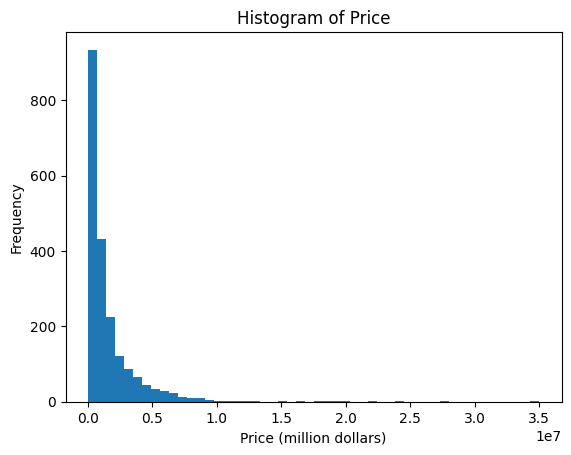

In [49]:
plt.hist(car_data['Price'], bins=50)
plt.title('Histogram of Price')
plt.xlabel('Price (million dollars)')
plt.ylabel('Frequency')
plt.show()

In [68]:
car_bins = [0, 490000, 825000, 1925000, 3500000]
labels = [0, 1, 2, 3]
# car_data['price_cat'] = pandas.cut(car_data['Price'], bins=car_bins, labels=labels, include_lowest=True)



car_data['price_cat'] = numpy.select(
    [car_data['Price'] >= 1925000,
     car_data['Price'] <= 490000,
     car_data['Price'].between(490000, 825000),
     car_data['Price'].between(825000, 1925000)],
    [0, 1, 2, 3],
    numpy.nan
)


car_data

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,price_cat
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,2.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,1.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,1.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,2.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,...,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0,3.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,...,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0,1.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,...,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0,1.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,...,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0,0.0


In [69]:
from sklearn.model_selection import train_test_split

car_feature = car_data.drop(columns=['Price'])
car_price = car_data['Price']

x_train, y_train, x_test, y_test = train_test_split(car_feature, car_price, test_size=0.2,
                                                    stratify=car_feature['price_cat'])

print(x_train)
print(y_train)
print(car_data)

               Make                        Model  Year  Kilometer Fuel Type  \
843   Maruti Suzuki              Baleno Zeta 1.2  2021       8499    Petrol   
1634  Maruti Suzuki               Ritz VXI BS-IV  2011      42152    Petrol   
24    Maruti Suzuki                 Alto LXi CNG  2019      47377       CNG   
1976           Ford  Ecosport Titanium 1.5L TDCi  2016      80000    Diesel   
1485           Audi    Q7 45 TDI Technology Pack  2017      45000    Diesel   
...             ...                          ...   ...        ...       ...   
138   Maruti Suzuki               Ritz VXI BS-IV  2011      58888    Petrol   
1016        Hyundai             i20 Active 1.4 S  2016      70500    Diesel   
1391         Toyota     Innova 2.5 G BS IV 8 STR  2016      65321    Diesel   
2019            BMW        X5 xDrive 30d M Sport  2015      87000    Diesel   
316           Honda                       Jazz S  2010      32000    Petrol   

     Transmission    Location   Color   Owner Selle

**2**

**3**

**4**

**5**

**6**

**7**

**8**